# Analyse du Test Diagnostique — Comprendre les Besoins des Élèves dès le Début

Ce notebook présente une analyse détaillée des résultats du test diagnostique.  
Il a pour objectifs :  
1. D’identifier les lacunes des élèves dans les domaines clés du programme de mathématiques  
2. De définir des stratégies pédagogiques ciblées pour y remédier

Le test diagnostique a été conçu pour évaluer les compétences fondamentales en mathématiques dès le début de l’année scolaire.  
Il permet aux enseignants de prendre des décisions pédagogiques éclairées basées sur des données concrètes plutôt que sur des impressions générales.

Ce document peut également servir de guide pour les enseignants souhaitant adopter une approche pédagogique fondée sur les données.


## 📦 Importation des Librairies Nécessaires

Nous commençons par importer les bibliothèques Python nécessaires à la manipulation et à la visualisation des données.

In [ ]:
# Traitement des données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Chargement des Résultats des Élèves

Nous allons maintenant charger les résultats du test diagnostique à partir d’un fichier Excel situé dans le dossier `data/`.

In [5]:
# Charger chaque fichier Excel correspondant à une classe
df_a = pd.read_excel("../data/1APIC3.xlsx")
df_b = pd.read_excel("../data/1APIC4.xlsx")
df_c = pd.read_excel("../data/1APIC5.xlsx")

# Ajouter une colonne pour indiquer la classe
df_a["Class"] = "Classe 1 APIC 3"
df_b["Class"] = "Classe 1 APIC 4"
df_c["Class"] = "Classe 1 APIC 5"

# Concaténer les données pour avoir une vue d’ensemble
df_total = pd.concat([df_a, df_b, df_c], ignore_index=True)


## 📑 Structure du Test & Explication des Données

Le test diagnostique a été conçu pour évaluer les compétences fondamentales des élèves en **algèbre**, **géométrie**, et **résolution de problèmes**. Il se composait de six exercices, répartis comme suit :

- **Exercice 1** : Classification des Nombres
  - Les élèves devaient classer des nombres en trois catégories : entiers, décimaux ou fractions.
  
- **Exercice 2** : Opérations Arithmétiques sur Différents Types de Nombres
  - Cet exercice testait la capacité à effectuer les quatre opérations de base (addition, soustraction, multiplication et division) sur des entiers, décimaux et des fractions.
  
- **Exercice 3** : Ordonnancement des Nombres
  - Les élèves devaient classer une série de nombres (entiers, décimaux et fractions) dans un ordre croissant ou décroissant.
  
- **Exercice 4** : Différenciation entre un Segment de Droite et une Demi-Droite
  - Cet exercice de géométrie visait à tester la compréhension des élèves des figures géométriques en leur demandant de distinguer entre un segment de droite et une demi-droite.
  
- **Exercice 5** : Calcul des Mesures de Formes Régulières
  - Les élèves devaient calculer les mesures de base (comme le périmètre et la surface) de formes géométriques régulières telles que des carrés et des triangles.
  
- **Exercice 6** : Problème de Proportionnalité et Pourcentage
  - Le dernier exercice consistait en une application pratique de la proportionnalité et des pourcentages, testant la capacité des élèves à résoudre des problèmes concrets en utilisant ces concepts.

### 🔹 Explication des Colonnes du Dataset :
Le dataset contient les colonnes suivantes :
- **ID Élève** : L'identifiant unique pour chaque élève (nom remplacé pour la protection des données).
- **Exercice 1 - Algèbre** : Le score pour le premier exercice lié à l'algèbre.
- **Exercice 2 - Algèbre** : Le score pour le deuxième exercice lié à l'algèbre.
- **Exercice 3 - Algèbre** : Le score pour le troisième exercice lié à l'algèbre.
- **Exercice 4 - Géométrie** : Le score pour le quatrième exercice lié à la géométrie.
- **Exercice 5 - Géométrie** : Le score pour le cinquième exercice lié à la géométrie.
- **Exercice 6 - Résolution de Problèmes** : Le score pour le dernier exercice de résolution de problèmes.
- **Total Algèbre** : Le total des points pour tous les exercices d'algèbre.
- **Total Géométrie** : Le total des points pour tous les exercices de géométrie.
- **Total Résolution de Problèmes** : Le total des points pour les exercices de résolution de problèmes.
- **Sexe** : Le sexe de l'élève, où "M" représente masculin et "F" représente féminin.

### 🔹 Aperçu des Données
Voici un aperçu de la structure du dataset :


In [6]:
# Aperçu des données : Afficher les premières lignes du dataset
df_total.head()

,ID Élève,sexe,Exercice 1,Exercice 2,Exercice 3,Total Algèbre,Exercice 4,Exercice 5,Total Géométrie,Exercice 6,Total Résolution de Problèmes,Class
0,1,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0,Classe 1 APIC 3
1,2,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,Classe 1 APIC 3
2,3,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classe 1 APIC 3
3,4,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0,Classe 1 APIC 3
4,5,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0,Classe 1 APIC 3


## 👥 Analyse de la Démographie des Classes

Dans cette section, nous analysons la structure de la population étudiante à travers les trois classes ayant passé le test diagnostique. L'objectif est de comprendre la répartition des étudiants par classe et par sexe (filles et garçons).

Nous calculons :
- Le nombre total d'étudiants dans chaque classe.
- Le nombre d'étudiants masculins et féminins dans chaque classe.
- Les totaux globaux pour toutes les classes.

Ces informations aident à identifier d'éventuels déséquilibres entre les sexes et assurent une analyse équitable et inclusive.

In [8]:
# Créer une liste pour le résumé
summary = []

# Boucler à travers chaque classe et collecter les données
for name, df in {
    '1 APIC 3': df_a,
    '1 APIC 4': df_b,
    '1 APIC 5': df_c
}.items():
    total = len(df)  # Nombre total d'élèves dans la classe
    males = (df['sexe'] == 'M').sum()  # Nombre d'élèves masculins
    females = (df['sexe'] == 'F').sum()  # Nombre d'élèves féminins
    summary.append([name, males, females, total])  # Ajouter les résultats à la liste

# Ajouter la ligne des totaux
total_all = sum(row[3] for row in summary)  # Total des élèves
total_males = sum(row[1] for row in summary)  # Total des garçons
total_females = sum(row[2] for row in summary)  # Total des filles
summary.append(['Total', total_males, total_females, total_all])  # Ajouter la ligne des totaux

# Créer le DataFrame
df_summary = pd.DataFrame(summary, columns=['Classe', 'Garçons', 'Filles', 'Total'])

# Afficher le tableau
df_summary.style.hide(axis="index")


Classe,Garçons,Filles,Total
1 APIC 3,17,14,31
1 APIC 4,20,11,31
1 APIC 5,18,13,31
Total,55,38,93


### Distribution des Genres par Classe (Graphique en Donut)

Pour mieux comprendre la composition par genre dans chaque classe, nous visualisons le nombre d'élèves masculins et féminins à l'aide d'un graphique en donut. Ce type de visualisation permet de mettre en évidence la proportion de chaque genre de manière claire et est utile pour identifier d'éventuels déséquilibres qui pourraient influencer la dynamique de groupe ou les approches pédagogiques.


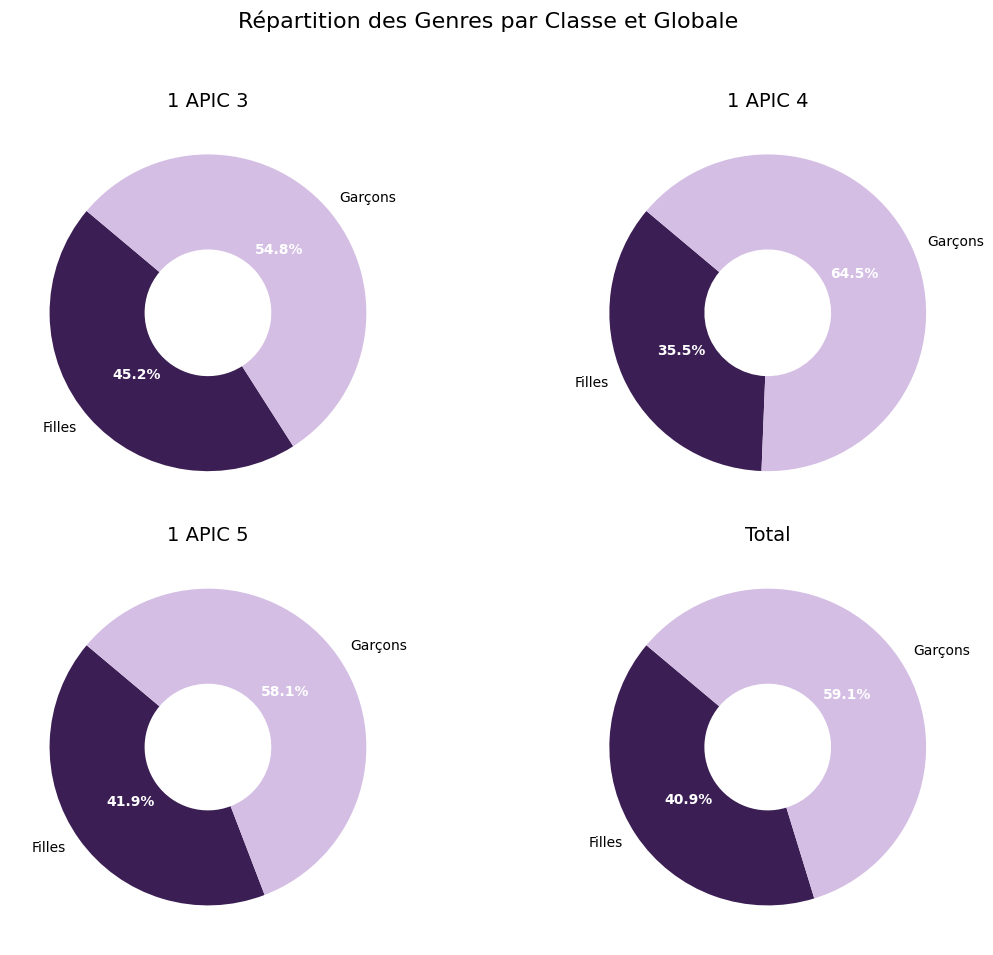

In [9]:
# Liste des DataFrames pour chaque classe
class_data = [df_a, df_b, df_c, df_total]
class_names = ['1 APIC 3', '1 APIC 4', '1 APIC 5', 'Total']

# Définir le style du graphique
colors = ['#3B1E54', '#D4BEE4']
labels = ['Filles', 'Garçons']

# Créer une figure avec 2x2 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Aplatir pour faciliter l'itération

# Générer des graphiques en donut
for i, (df, title) in enumerate(zip(class_data, class_names)):
    counts = df['sexe'].value_counts()
    values = [counts.get('F', 0), counts.get('M', 0)]

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'width': 0.6}
    )
        
    axes[i].set_title(f'{title}', fontsize=14)
    plt.setp(autotexts, size=10, weight='bold', color='white')

# Cacher le sous-graphique inutilisé si nécessaire (au cas où il y en aurait moins de 4)
if len(class_data) < 4:
    for j in range(len(class_data), 4):
        fig.delaxes(axes[j])

# Ajouter un titre général et ajustements de mise en page
plt.suptitle('Répartition des Genres par Classe et Globale', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Analyse de la Présence des Élèves

Ensuite, nous examinons **la présence des élèves lors du test diagnostique** en identifiant les données manquantes (valeurs NaN) dans les feuilles de résultats. Ces valeurs manquantes correspondent généralement aux élèves qui étaient **absents** lors du test. Nous résumons ces données par classe et globalement, puis les visualisons à l'aide d'un graphique à barres groupées montrant :

- Le **nombre total d'élèves** inscrits par classe.
- Le **nombre d'élèves présents** (c'est-à-dire ceux qui ont soumis des données complètes du test).


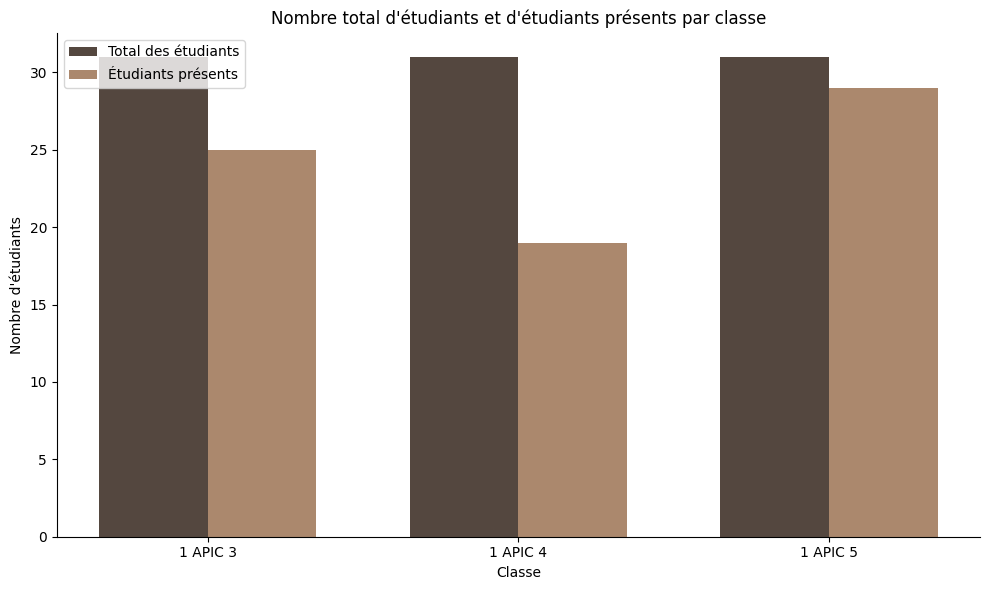

In [10]:
# Compter le nombre total d'étudiants et le nombre d'étudiants présents par classe
def count_attendance(df):
    total = len(df)
    present = df.dropna().shape[0]  # lignes sans NaN
    return total, present

totals_apic1_3 = count_attendance(df_a)
totals_apic1_4 = count_attendance(df_b)
totals_apic1_5 = count_attendance(df_c)

# Étiquettes pour les classes
labels = ['1 APIC 3', '1 APIC 4', '1 APIC 5']
total_entries = [totals_apic1_3[0], totals_apic1_4[0], totals_apic1_5[0]]
non_nan_counts = [totals_apic1_3[1], totals_apic1_4[1], totals_apic1_5[1]]

# Paramétrer le graphique en barres
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.bar(x, total_entries, width, label='Total des étudiants', color='#54473F')
ax.bar([p + width for p in x], non_nan_counts, width, label='Étudiants présents', color='#AB886D')

# Personnalisation

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Classe')
ax.set_ylabel('Nombre d\'étudiants')
ax.set_title('Nombre total d\'étudiants et d\'étudiants présents par classe')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


### **Feedback sur la Structure des Classes**

Après avoir analysé la **répartition des sexes** dans les trois classes, nous constatons une tendance constante : **le nombre de garçons dépasse celui des filles** dans les trois classes. Cela pourrait indiquer un déséquilibre entre les sexes dans la composition des classes, ce qui pourrait être une information utile lors de la planification de stratégies pédagogiques différenciées ou d'activités en groupe.

De plus, en ce qui concerne **la présence des élèves**, les données montrent que le nombre d'**élèves absents** est assez faible dans chaque classe. C'est un signe positif, indiquant que la plupart des élèves étaient présents pour le test diagnostique. Le faible nombre d'absents suggère un niveau élevé d'engagement et d'implication des élèves, ce qui est essentiel pour une évaluation précise de leurs compétences et capacités au début de l'année. Par conséquent, cet ensemble de données semble refléter parfaitement nos classes, nous offrant une base fiable pour des analyses et actions futures.

Cette analyse fournit un aperçu précieux de la composition et de l'engagement des élèves, nous aidant à prendre des décisions éclairées concernant les interventions ciblées et les méthodes d'enseignement.
